## Slices vs. accuracy plot ##

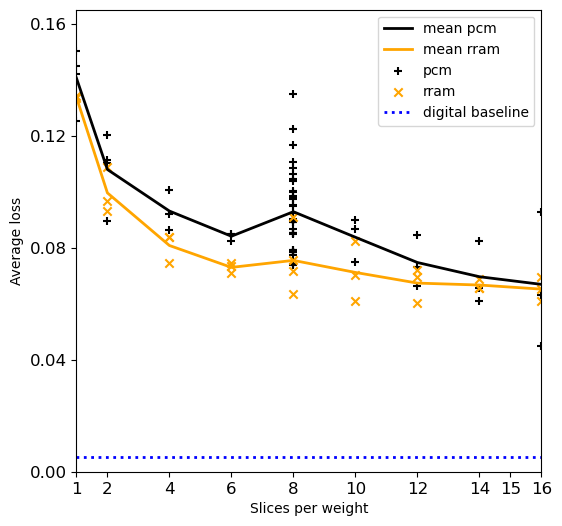

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("data/128_4_189_150_sweep_data.csv")

plt.figure(figsize=(6, 6))
# Filter the data
filtered_df = df[(df.iloc[:, 0] == "pcm") | (df.iloc[:, 0] == "rram") & (df.iloc[:, 3] == 0.0)]


# Filter the DataFrame by 'type' and group by 'faults' to calculate the mean of 'loss' for each group
mean_df_pcm = filtered_df[filtered_df['type'] == 'pcm'].groupby('slices')['loss'].mean()
mean_df_rram = filtered_df[filtered_df['type'] == 'rram'].groupby('slices')['loss'].mean()

# Create line plots with the index of mean_df (i.e., 'faults') as the x-axis and the values of mean_df (i.e., mean 'loss') as the y-axis
plt.plot(mean_df_pcm.index, mean_df_pcm.values, color='black', linewidth=2, label='mean pcm')
plt.plot(mean_df_rram.index, mean_df_rram.values, color='orange', linewidth=2, label='mean rram')

# Create the scatter plot with different colors for "pcm" and "rram"
plt.scatter(filtered_df[filtered_df['type'] == 'pcm'].iloc[:, 4], filtered_df[filtered_df['type'] == 'pcm'].iloc[:, 7], c='black', marker='+', label='pcm')
plt.scatter(filtered_df[filtered_df['type'] == 'rram'].iloc[:, 4], filtered_df[filtered_df['type'] == 'rram'].iloc[:, 7], c='orange', marker='x', label='rram')
# Get the values for the line plot
digital_df = df[(df.iloc[:, 0] == "digital")]



# Create a new DataFrame where each row of digital_df is repeated 16 times
repeated_df = pd.concat([digital_df]*16, ignore_index=True)

# Create a new column 'slices' with values from 1 to 16
# The values are repeated as many times as there are rows in digital_df
repeated_df['slices'] = [i for i in range(1, 17) for _ in range(len(digital_df))]

# Now you can plot the 8th column of repeated_df
plt.axhline(y=digital_df['loss'][0], color='blue', linewidth=2, linestyle='dotted', label='digital baseline')

plt.tick_params(axis='both', which='both', labelsize=12)
# Get the current y-axis limits
ymin, ymax = 0.0, 0.2
import numpy as np
# Generate the tick locations
yticks = np.arange(ymin, ymax, 0.04)  # Replace step_size with the desired step size

# Set the y-axis tick locations
plt.yticks(yticks)

# Get the current x-axis limits
xmin, xmax = plt.xlim()
plt.xlim(1,16)
plt.ylim(0.0, 0.165)

# Generate the tick locations
xticks = np.arange(1, 16, 2)  # Replace 1 with the desired step size
xticks = (1, 2, 4, 6, 8, 10, 12, 14, 15, 16)

# Set the x-axis tick locations
plt.xticks(xticks)

plt.xlabel("Slices per weight")
plt.ylabel("Average loss")
plt.legend()
plt.show()

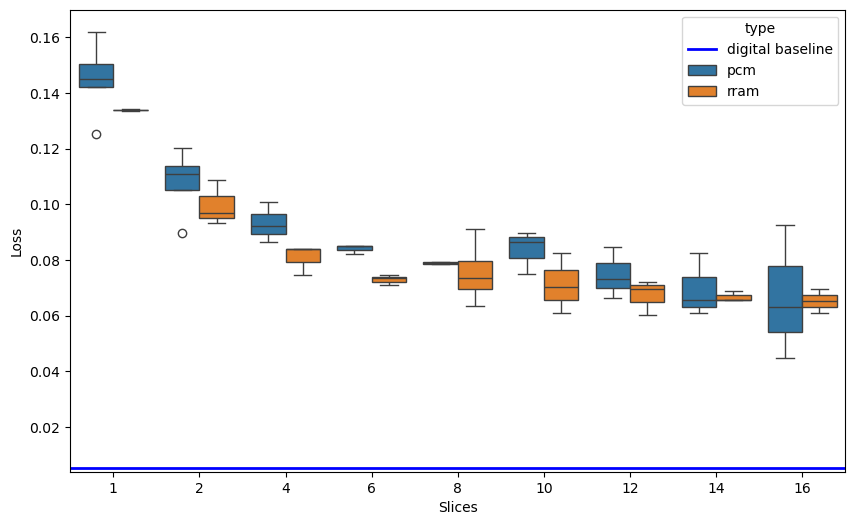

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("data/128_4_189_150_sweep_data.csv")

# Filter the rows where type is 'pcm' and faults is 0.0
pcm_df = df[(df['type'] == 'pcm') & (df['faults'] == 0.0)]

# Filter the rows where type is 'rram' and faults is 0.0
rram_df = df[(df['type'] == 'rram') & (df['faults'] == 0.0)]


# Concatenate the pcm_df and rram_df DataFrames
combined_df = pd.concat([pcm_df, rram_df])

# Get the values for the line plot
digital_df = df[(df.iloc[:, 0] == "digital")]
# Create a new DataFrame where each row of digital_df is repeated 16 times
repeated_df = pd.concat([digital_df]*17, ignore_index=True)

# Create a new column 'slices' with values from 1 to 16
# The values are repeated as many times as there are rows in digital_df
repeated_df['slices'] = [i for i in range(0, combined_df['slices'].max() + 1) for _ in range(len(digital_df))]



# Create a boxplot with 'type' as the hue
plt.figure(figsize=(6, 6))
# Now you can plot the 8th column of repeated_df
plt.ylim(combined_df['loss'].min(), combined_df['loss'].max())
plt.ylim(repeated_df['loss'].min()*0.75, combined_df['loss'].max()*1.05)
plt.axhline(y=digital_df['loss'][0], color='blue', linewidth=2, label='digital baseline')
sns.boxplot(x='slices', y='loss', hue='type', data=combined_df)

plt.xlabel('Slices')
plt.ylabel('Loss')
plt.show()

## Recovered faults ##

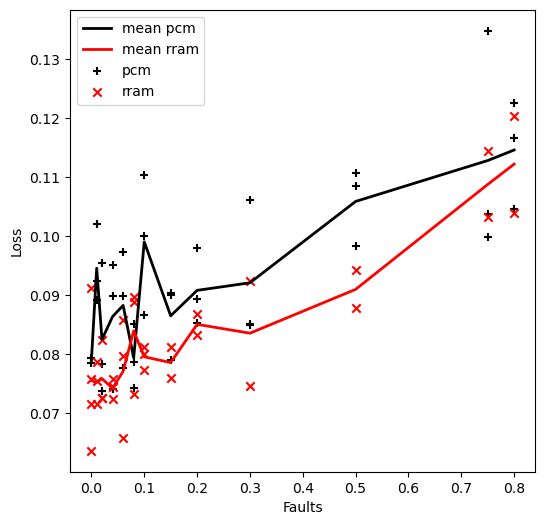

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("data/128_4_189_150_sweep_data.csv")

plt.figure(figsize=(6, 6))
# Filter the data for 'pcm' and 'rram'
filtered_df = df[(((df['type'] == "pcm") | (df['type'] == "rram")) & (df['slices'] == 8)) & ((df['train'] != 'notrain') | (df['faults'] == 0.0))]
# Filter the DataFrame by 'type' and group by 'faults' to calculate the mean of 'loss' for each group
mean_df_pcm = filtered_df[filtered_df['type'] == 'pcm'].groupby('faults')['loss'].mean()
mean_df_rram = filtered_df[filtered_df['type'] == 'rram'].groupby('faults')['loss'].mean()

# Create line plots with the index of mean_df (i.e., 'faults') as the x-axis and the values of mean_df (i.e., mean 'loss') as the y-axis
plt.plot(mean_df_pcm.index, mean_df_pcm.values, color='black', linewidth=2, label='mean pcm')
plt.plot(mean_df_rram.index, mean_df_rram.values, color='red', linewidth=2, label='mean rram')

# Create the scatter plot with different colors for "pcm" and "rram"
plt.scatter(filtered_df[filtered_df['type'] == 'pcm']['faults'], filtered_df[filtered_df['type'] == 'pcm']['loss'], c='black', marker='+', label='pcm')
plt.scatter(filtered_df[filtered_df['type'] == 'rram']['faults'], filtered_df[filtered_df['type'] == 'rram']['loss'], c='red', marker='x', label='rram')

# Filter the data for 'digital'
digital_df = df[df['type'] == "digital"]

#plt.axhline(y=digital_df['loss'][0], color='blue', linewidth=2, label='digital baseline')


# Create a line plot with the "faults" column as the x-axis and 'loss' column as the y-axis
plt.xlabel("Fault ratio")
plt.ylabel("Loss")
plt.legend()
plt.show()

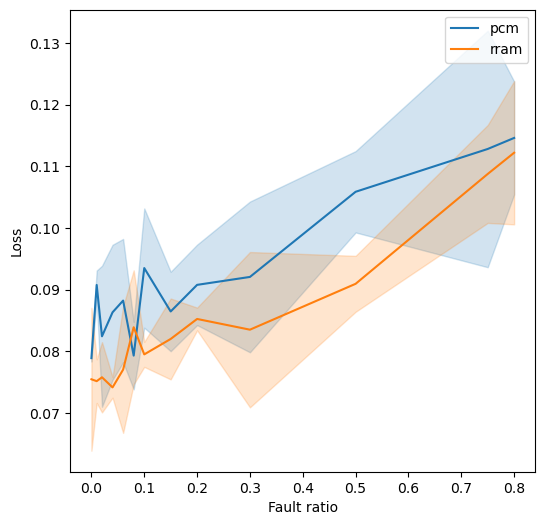

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("data/128_4_189_150_sweep_data.csv")

plt.figure(figsize=(6, 6))
# Filter the data for 'pcm' and 'rram'
filtered_df = df[(((df['type'] == "pcm") | (df['type'] == "rram")) & (df['slices'] == 8)) & ((df['train'] != 'notrain') | (df['faults'] == 0.0))]

plt.tick_params(axis='both', which='both', labelsize=12)
# Create line plots with seaborn
sns.lineplot(data=filtered_df, x='faults', y='loss', hue='type', errorbar='sd')

# Filter the data for 'digital'
digital_df = df[df['type'] == "digital"]

# Create a line plot with the "faults" column as the x-axis and 'loss' column as the y-axis
plt.xlabel("Fault ratio")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Faults vs. Accuracy (no retrain) ##

12


/tmp/ipykernel_2356451/3128516684.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = filtered_df.groupby(['faults', 'type']).apply(sample_rows).reset_index(drop=True)


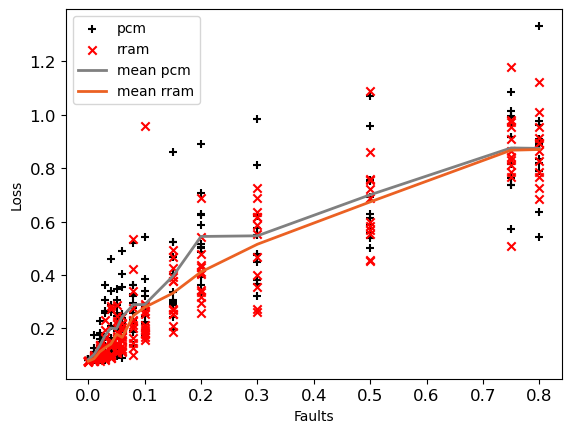

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("data/128_4_189_150_sweep_notrainfaults_data.csv")

# Filter the data for 'pcm' and 'rram'
filtered_df = df[(((df['type'] == "pcm") | (df['type'] == "rram")) & (df['slices'] == 8)) & ((df['train'] == 'notrain') | (df['faults'] == 0.0))]

# Group the data by 'faults' and 'type' and get the size of each group
group_sizes = filtered_df.groupby(['faults', 'type']).size()

# Get the minimum group size
min_size = group_sizes.min()
print(min_size)

# Define a function to sample rows from each group
def sample_rows(x):
    if len(x) > min_size:
        return x.sample(min_size)
    return x

# Apply the function to each group
balanced_df = filtered_df.groupby(['faults', 'type']).apply(sample_rows).reset_index(drop=True)

# Now, for each number of 'faults', there's the same amount of data points
filtered_df = balanced_df

# Filter the DataFrame by 'type' and group by 'faults' to calculate the mean of 'loss' for each group
mean_df_pcm = filtered_df[filtered_df['type'] == 'pcm'].groupby('faults')['loss'].mean()
mean_df_rram = filtered_df[filtered_df['type'] == 'rram'].groupby('faults')['loss'].mean()

# Create the scatter plot with different colors for "pcm" and "rram"
plt.scatter(filtered_df[filtered_df['type'] == 'pcm']['faults'], filtered_df[filtered_df['type'] == 'pcm']['loss'], c='black', marker='+', label='pcm')
plt.scatter(filtered_df[filtered_df['type'] == 'rram']['faults'], filtered_df[filtered_df['type'] == 'rram']['loss'], c='red', marker='x', label='rram')

# Create line plots with the index of mean_df (i.e., 'faults') as the x-axis and the values of mean_df (i.e., mean 'loss') as the y-axis
plt.plot(mean_df_pcm.index, mean_df_pcm.values, color='gray', linewidth=2, label='mean pcm')
plt.plot(mean_df_rram.index, mean_df_rram.values, color='#eb6123', linewidth=2, label='mean rram')

#print(filtered_df)

#plt.axhline(y=digital_df['loss'][0], color='blue', linewidth=2, label='digital baseline')
plt.tick_params(axis='both', which='both', labelsize=12)

# Create a line plot with the "faults" column as the x-axis and 'loss' column as the y-axis
plt.xlabel("Faults")
plt.ylabel("Loss")
plt.legend()
plt.show()

12


/tmp/ipykernel_2356451/770668471.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = filtered_df.groupby(['faults', 'type']).apply(sample_rows).reset_index(drop=True)


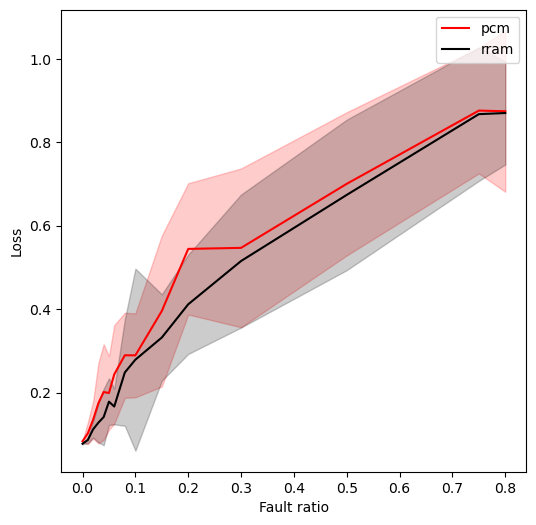

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("data/128_4_189_150_sweep_notrainfaults_data.csv")

# Filter the data for 'pcm' and 'rram'
filtered_df = df[(((df['type'] == "pcm") | (df['type'] == "rram")) & (df['slices'] == 8)) & ((df['train'] == 'notrain') | (df['faults'] == 0.0))]

# Group the data by 'faults' and 'type' and get the size of each group
group_sizes = filtered_df.groupby(['faults', 'type']).size()

# Get the minimum group size
min_size = group_sizes.min()
print(min_size)
plt.figure(figsize=(6, 6))

# Define a function to sample rows from each group
def sample_rows(x):
    if len(x) > min_size:
        return x.sample(min_size)
    return x

# Apply the function to each group
balanced_df = filtered_df.groupby(['faults', 'type']).apply(sample_rows).reset_index(drop=True)

# Now, for each number of 'faults', there's the same amount of data points
filtered_df = balanced_df

# Create line plots with seaborn
sns.lineplot(data=filtered_df, x='faults', y='loss', hue='type', palette=['r', 'black'], errorbar='sd')

# Filter the data for 'digital'
digital_df = df[df['type'] == "digital"]

# Create a line plot with the "faults" column as the x-axis and 'loss' column as the y-axis
plt.xlabel("Fault ratio")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Drift over time vs. Loss ##

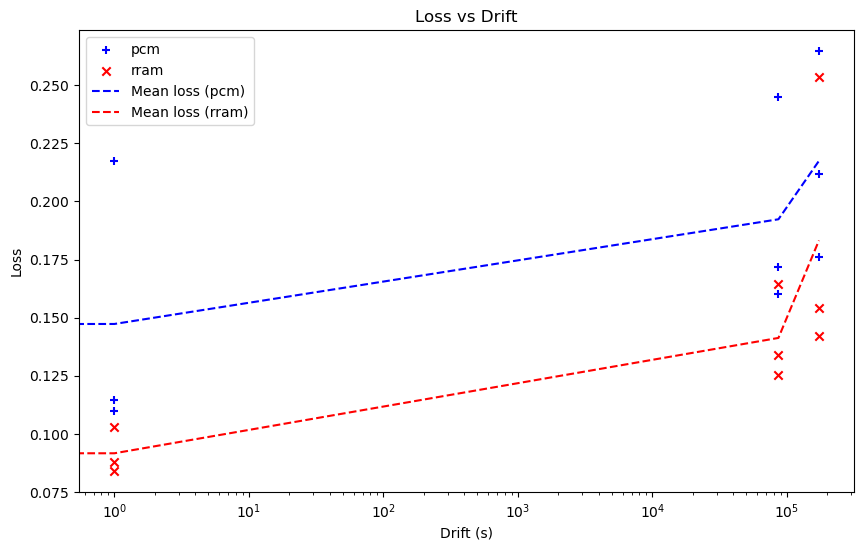

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('data/128_4_189_150_drift_8_data.csv')

# Filter the data
df = df[df['type'].isin(['pcm', 'rram'])]

# Calculate the mean loss for pcm and rram
mean_loss = df.groupby(['drift', 'type'])['loss'].mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[df['type'] == 'pcm']['drift'], df[df['type'] == 'pcm']['loss'], color='blue', marker="+", label='pcm')
plt.scatter(df[df['type'] == 'rram']['drift'], df[df['type'] == 'rram']['loss'], color='red', marker="x", label='rram')

# Plot the mean loss# Plot the mean loss per drift value
plt.plot(mean_loss[mean_loss['type'] == 'pcm']['drift'], mean_loss[mean_loss['type'] == 'pcm']['loss'], color='blue', linestyle='--', label='Mean loss (pcm)')
plt.plot(mean_loss[mean_loss['type'] == 'rram']['drift'], mean_loss[mean_loss['type'] == 'rram']['loss'], color='red', linestyle='--', label='Mean loss (rram)')

# Set the labels and title
plt.xlabel('Drift (s)')
plt.ylabel('Loss')
plt.title('Loss vs Drift')
plt.legend()
plt.xscale('log')

# Show the plot
plt.show()

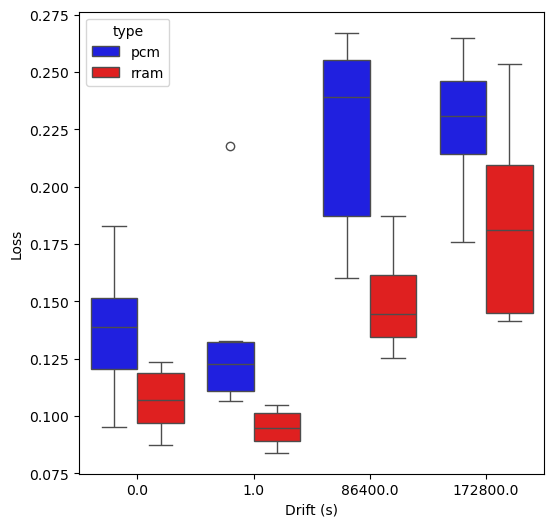

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data/128_4_189_150_drift_8_data.csv')

# Filter the data for PCM and RRAM
df = df[df['type'].isin(['pcm', 'rram'])]

# Create the box plot
plt.figure(figsize=(6, 6))
sns.boxplot(x='drift', y='loss', hue='type', data=df, palette=['b', 'r'])

# Set the labels and title
plt.xlabel('Drift (s)')
plt.ylabel('Loss')

# Show the plot
plt.show()

[0.27646905118946774, 0.417528892108511, 0.4913229343950979, 0.43629669157121453, 0.42850444479440386, 0.42832164515757937, 0.49235303436391853, 0.4283625059577229, 0.42604977438375297, 0.3165765561452593, 0.3289156081863647, 0.44744918910824455, 0.45667912051351794, 0.3713021037283921, 0.4715376732527023, 0.28530469588072843, 0.28188193818262264, 0.5532190498495606, 0.36173846944551424, 0.4060893224089694, 0.3625193571477348, 0.39747379052292015, 0.31433649262653784, 0.4185846896515267, 0.43763743027298047, 0.6024681235343078, 0.4443466915159507, 0.35065070033682016, 0.47138189156110377, 0.42182455399311714, 0.4695675482803906, 0.40749184680269274, 0.426209956224322, 0.35552176534776986, 0.2102099948285482, 0.3752859241132114, 0.3110403554520534, 0.43710547466965916, 0.5106768893020128, 0.4363257926288944, 0.5711916957195265, 0.5343891746801419, 0.3013475012728378, 0.4505853285825324, 0.3482778169661781, 0.5729474248093603, 0.42406099455149604, 0.3675941520453873, 0.46192766189265194,

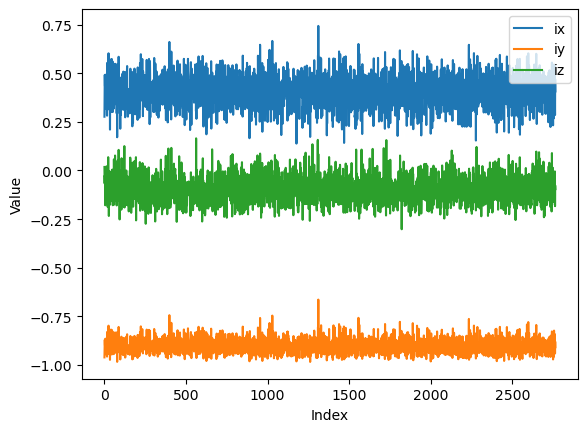

In [6]:
import pickle

# Load the pickle file
with open('log_i.pk', 'rb') as file:
    list1, list2, list3 = pickle.load(file)

print(list1)


# Plot each value separately
import matplotlib.pyplot as plt

plt.plot(list1, label='ix')
plt.plot(list2, label='iy')
plt.plot(list3, label='iz')

plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()